In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

In [51]:
#Leyendo datos
df= pd.read_csv("C:/Users/LUISPEDRO/Desktop/Universidad Del Valle/Semestre 7/InteligenciaArtificial/Lab2/Walmart.csv")
#Ordenando datos por fecha
datos = df.sort_values(by='Date')

<AxesSubplot:ylabel='Frequency'>

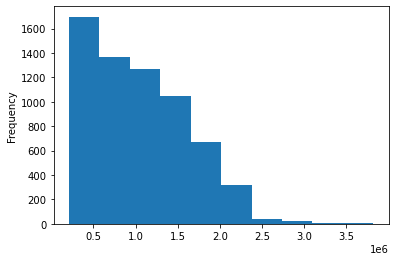

In [52]:
#Analizando un poco los datos
datos["Weekly_Sales"].plot.hist()

### TODAS LAS VARIABLES SON INDEPENDIENTES, A EXEPCIÓN DE WEEKLY_SALES

In [53]:
#Exploración de Variables
datos.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5208,37,01-04-2011,534578.78,0,67.31,3.524,213.577670,8.300
1204,9,01-04-2011,520962.14,0,56.12,3.524,218.445164,6.380
1776,13,01-04-2011,1864238.64,0,42.49,3.487,128.719935,7.193
2634,19,01-04-2011,1305950.22,0,30.68,3.811,134.068258,7.658
6066,43,01-04-2011,611585.54,0,67.79,3.524,206.673311,10.581


In [54]:
datos=datos.drop(["Holiday_Flag"],axis=1)
datos.drop(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
5208,37,01-04-2011,534578.78,67.31,3.524,213.577670,8.300
1204,9,01-04-2011,520962.14,56.12,3.524,218.445164,6.380
1776,13,01-04-2011,1864238.64,42.49,3.487,128.719935,7.193
2634,19,01-04-2011,1305950.22,30.68,3.811,134.068258,7.658
6066,43,01-04-2011,611585.54,67.79,3.524,206.673311,10.581
...,...,...,...,...,...,...,...
1620,12,31-12-2010,891736.91,45.64,3.148,127.087677,14.313
5767,41,31-12-2010,1001790.16,25.19,2.829,191.255700,7.508
5624,40,31-12-2010,811318.30,19.29,3.177,132.815032,5.287
2907,21,31-12-2010,672903.23,47.19,2.943,211.064774,8.163


In [56]:
#splitting data in input and output
X=datos.drop(['Weekly_Sales','Store','Date'],axis=1)
y=datos['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [57]:
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

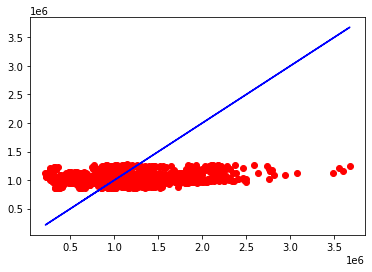

In [58]:
y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [59]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

569802.7021517218


In [60]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.024732372274047232


In [65]:
prediction=LR.predict(pd.DataFrame([(40,2.876,173.325456,7.934)]))
print(prediction)

[1067857.15118184]
